In [1]:
import numpy as np

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
def svd(matrix):
    
    A_AT = matrix @ matrix.T
    AT_A = matrix.T @ matrix
    
    val_U, vec_U = np.linalg.eigh(A_AT)
    val_V, vec_V = np.linalg.eigh(AT_A)
    
    indexes_U = np.argsort(val_U)[::-1]
    vec_U = vec_U[:, indexes_U]
    val_U = val_U[indexes_U]
    
    indexes_V = np.argsort(val_V)[::-1]
    vec_V = vec_V[:, indexes_V]
    val_V = val_V[indexes_V]
    
    sigma = np.zeros_like(matrix)
    
    for i in range(min(matrix.shape)):
        sigma[i, i] = np.sqrt(val_U[i]) if val_U[i] > 0 else 0
    
    return vec_U, sigma, vec_V
    
    
    

In [5]:
a = np.array([[1, 3, 4],
             [5, 2, 1],
             [4, 2, 9]])

In [6]:
svd(a)

(array([[-0.40431832,  0.17827359, -0.89707593],
        [-0.32540656, -0.94468181, -0.0410712 ],
        [-0.85477323,  0.27530855,  0.43996356]]),
 array([[11,  0,  0],
        [ 0,  4,  0],
        [ 0,  0,  2]]),
 array([[-0.46854203, -0.82202667,  0.32363641],
        [-0.30717645, -0.19188948, -0.93210571],
        [-0.82831817,  0.53614419,  0.16259895]]))

In [7]:
svd(a)[0] @ svd(a)[1] @ svd(a)[2]

array([[ 3.35092421,  2.55720549, -2.39577996],
       [ 2.9059092 ,  3.62347936,  2.35036948],
       [ 3.33833617,  7.98956278, -3.92638459]])

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('/Users/alexeyomelchenko/Downloads/ml-latest-small/ratings.csv')

In [10]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
df.userId.nunique()

610

In [12]:
ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')

In [13]:
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings_matrix = ratings_matrix.dropna(thresh=10, axis=0)
ratings_matrix.shape

(610, 9724)

In [15]:
ratings_matrix = ratings_matrix.dropna(thresh=10, axis=1)
ratings_matrix.shape

(610, 2269)

In [19]:
 ratings_matrix_filled = ratings_matrix.fillna(ratings_matrix.mean().mean())

In [20]:
ratings_matrix_filled

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.00000,3.43205,4.00000,3.43205,4.00000,3.43205,3.43205,3.43205,3.43205,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205
2,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205
3,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205
4,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205
5,4.00000,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.50000,3.43205,3.43205,3.43205,3.43205,2.50000,3.43205,3.43205,2.50000,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205
607,4.00000,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.00000,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205
608,2.50000,2.00000,2.00000,3.43205,3.43205,3.43205,3.43205,4.00000,3.43205,3.43205,...,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205,3.43205


In [21]:
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [31]:
R_demeaned

array([[ 0.47943605, -0.08851361,  0.47943605, ..., -0.08851361,
        -0.08851361, -0.08851361],
       [-0.00628766, -0.00628766, -0.00628766, ..., -0.00628766,
        -0.00628766, -0.00628766],
       [ 0.02065633,  0.02065633,  0.02065633, ...,  0.02065633,
         0.02065633,  0.02065633],
       ...,
       [-0.84965922, -1.34965922, -1.34965922, ...,  0.08239112,
         0.08239112,  0.08239112],
       [-0.42999421,  0.00205613,  0.00205613, ...,  0.00205613,
         0.00205613,  0.00205613],
       [ 1.4381949 , -0.12975476, -0.12975476, ..., -0.12975476,
        -0.12975476, -0.12975476]])

In [23]:
from scipy.sparse.linalg import svds

In [24]:
U, sigma, Vt = svds(R_demeaned, k=3)

In [35]:
U

array([[-0.09568472, -0.02893908,  0.06191867],
       [ 0.00955961, -0.00831007,  0.00389029],
       [ 0.01331018, -0.01003464, -0.00630416],
       ...,
       [ 0.32082549,  0.02024662,  0.12560277],
       [ 0.00276514,  0.00164241,  0.00330571],
       [ 0.04423967, -0.07682278,  0.15923845]])

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

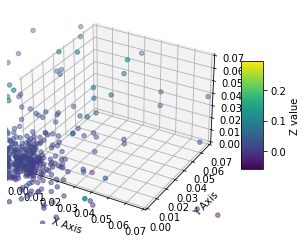

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = U[:, 0]
y = U[:, 1]
z = U[:, 2]

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

colorbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
colorbar.set_label('Z value')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

ax.set_xlim(0, 0.07) 
ax.set_ylim(0, 0.07)  
ax.set_zlim(0, 0.07)
plt.show()

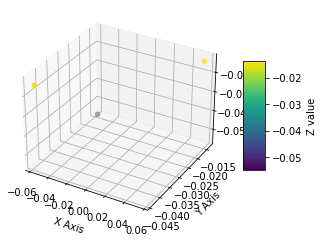

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = Vt[:, 0]
y = Vt[:, 1]
z = Vt[:, 2]

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

colorbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
colorbar.set_label('Z value')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')


plt.show()

# Task #3

In [50]:
df = pd.read_csv('/Users/alexeyomelchenko/Downloads/ml-latest-small/ratings.csv')
ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix = ratings_matrix.dropna(thresh=10, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=10, axis=1)
ratings_matrix_filled = ratings_matrix.fillna(ratings_matrix.mean().mean())

In [51]:
R = ratings_matrix_filled.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [52]:
R_demeaned

array([[ 0.47943605, -0.08851361,  0.47943605, ..., -0.08851361,
        -0.08851361, -0.08851361],
       [-0.00628766, -0.00628766, -0.00628766, ..., -0.00628766,
        -0.00628766, -0.00628766],
       [ 0.02065633,  0.02065633,  0.02065633, ...,  0.02065633,
         0.02065633,  0.02065633],
       ...,
       [-0.84965922, -1.34965922, -1.34965922, ...,  0.08239112,
         0.08239112,  0.08239112],
       [-0.42999421,  0.00205613,  0.00205613, ...,  0.00205613,
         0.00205613,  0.00205613],
       [ 1.4381949 , -0.12975476, -0.12975476, ..., -0.12975476,
        -0.12975476, -0.12975476]])

In [53]:
U, sigma, Vt = svds(R_demeaned, k=3)

In [57]:
print(U.shape,
sigma.shape, 
Vt.shape)

(610, 3) (3,) (3, 2269)


In [59]:
sigma

array([39.80352714, 44.18919099, 79.08896776])

In [61]:
all_user_predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)

In [62]:
preds_df

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.073914,3.569557,3.681594,3.471186,3.792702,3.444852,3.481535,3.621039,3.607009,3.467361,...,3.462837,3.493232,3.482275,3.457168,3.527534,3.523550,3.517536,3.480254,3.461030,3.478463
2,3.455269,3.444129,3.418734,3.429323,3.455257,3.433479,3.434636,3.456000,3.440168,3.435292,...,3.443942,3.459388,3.439868,3.441070,3.459484,3.439818,3.441120,3.444080,3.439302,3.444140
3,3.379813,3.429307,3.395727,3.420676,3.400613,3.420857,3.415529,3.433491,3.413153,3.423058,...,3.419685,3.429351,3.412430,3.416021,3.424658,3.407336,3.408409,3.418793,3.414497,3.417168
4,3.452339,3.361936,3.484663,3.422406,3.425487,3.424737,3.437918,3.329523,3.420026,3.410802,...,3.420573,3.368955,3.447306,3.437498,3.380642,3.459282,3.455587,3.420611,3.443614,3.427307
5,3.478918,3.425188,3.448193,3.425758,3.455360,3.425752,3.431028,3.426006,3.437526,3.425120,...,3.429341,3.426205,3.434474,3.431324,3.430715,3.439451,3.438750,3.430532,3.432203,3.431712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.719073,3.213395,3.349619,3.265881,3.637897,3.344270,3.415776,3.246454,3.404970,3.307400,...,3.485557,3.491595,3.538503,3.517000,3.540339,3.585312,3.589907,3.485493,3.516221,3.516414
607,3.759017,3.537656,3.581929,3.468095,3.601182,3.438618,3.448745,3.563750,3.527426,3.458773,...,3.425562,3.443528,3.428203,3.416601,3.456092,3.445357,3.440928,3.436219,3.419045,3.429799
608,3.145456,2.969562,2.500907,2.910667,3.462300,3.147298,3.217731,3.169372,3.115077,3.093674,...,3.530191,3.792719,3.498293,3.529135,3.812831,3.501906,3.543326,3.505780,3.487563,3.555032


In [119]:
def rec_user(id_user):
    df = pd.read_csv('/Users/alexeyomelchenko/Downloads/ml-latest-small/ratings.csv')
    id_movies = pd.read_csv('/Users/alexeyomelchenko/Downloads/ml-latest-small/movies.csv', index_col=0)
    ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')
    ratings_matrix = ratings_matrix.dropna(thresh=10, axis=0)
    ratings_matrix = ratings_matrix.dropna(thresh=10, axis=1)
    ratings_matrix_filled = ratings_matrix.fillna(ratings_matrix.mean().mean())
    
    R = ratings_matrix_filled.values
    user_ratings_mean = np.mean(R, axis=1)
    R_demeaned = R - user_ratings_mean.reshape(-1, 1)
    all_user_predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt) + user_ratings_mean.reshape(-1, 1)
    preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)
    return id_movies.iloc[list(preds_df.iloc[id_user-1].sort_values(ascending=False).index)[0:10]]

In [126]:
rec_user(10)

,title,genres
movieId,,
2099,Song of the South (1946),Adventure|Animation|Children|Musical
181,Mighty Morphin Power Rangers: The Movie (1995),Action|Children
3624,Shanghai Noon (2000),Action|Adventure|Comedy|Western
2080,Lady and the Tramp (1955),Animation|Children|Comedy|Romance
410,Addams Family Values (1993),Children|Comedy|Fantasy
5610,"Banger Sisters, The (2002)",Comedy|Drama
205,Unstrung Heroes (1995),Comedy|Drama
242,Farinelli: il castrato (1994),Drama|Musical
54732,Balls of Fury (2007),Comedy
